In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the Data

In [2]:
univ = pd.read_csv('../Clustering/Universities.csv',index_col='Univ')
univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


In [3]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Brown to Yale
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SAT       25 non-null     int64
 1   Top10     25 non-null     int64
 2   Accept    25 non-null     int64
 3   SFRatio   25 non-null     int64
 4   Expenses  25 non-null     int64
 5   GradRate  25 non-null     int64
dtypes: int64(6)
memory usage: 1.4+ KB


### Scale the data using Minmax Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(univ)

### build the Model

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [10]:
model.fit(scaled_data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [12]:
univ['Labels']=model.labels_

In [13]:
univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0


In [14]:
grp = univ.groupby('Labels')

In [16]:
for x,y in grp:
    print(y)
    print('_'*60)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Labels
Univ                                                                  
Brown         1310     89      22       13     22704        94       0
CMU           1260     62      59        9     25026        72       0
Columbia      1310     76      24       12     31510        88       0
Cornell       1280     83      33       13     21864        90       0
Georgetown    1255     74      24       12     20126        92       0
Northwestern  1260     85      39       11     28052        89       0
NotreDame     1255     81      42       13     15122        94       0
UCBerkeley    1240     95      40       17     15140        78       0
UMichigan     1180     65      68       16     15470        85       0
UPenn         1285     80      36       11     27553        90       0
UVA           1225     77      44       14     13349        92       0
____________________________________________________________
             SAT

In [17]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Labels,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [18]:
from scipy.cluster import hierarchy

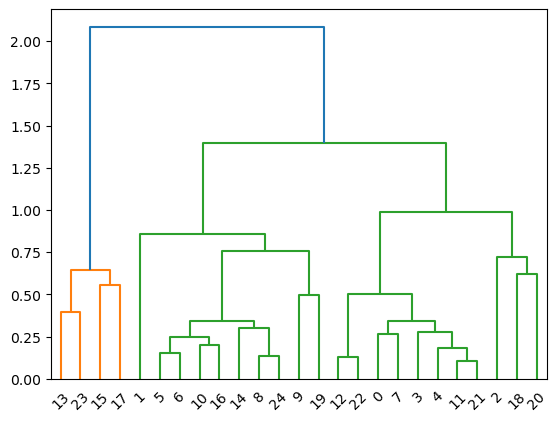

In [19]:
hr = hierarchy.linkage(scaled_data,method='complete')
dn = hierarchy.dendrogram(hr)